# Business Understanding

This project analyzes crash data to inform decision-making for Innovative Technologies, a tech company with offices in San Francisco and Seattle. Innovative Technologies teams often travel between these two cities, and they are considering purchasing their own plane(s) to use at local airports. For this decision they are mostly concerned with safety. 

To evaluate aviation safety I analyzed correlations between types of plane engine, severe injuries, weather, and human error. Our team can use this information to make informed decisions on safety issues when buying our company planes and hiring independent pilots. 

# Data Understanding 

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('AviationData.csv', encoding = 'Windows-1252', dtype ={'Latitude':str, 'Longitude':str, 'Broad.phase.of.flight':str})

# Aviation Crash Data

These records range from 1982 to 2022 and includes information about the type of plane involved in each incident, as well as the date, geographical location, weather conditions, and other details about the flight. 

A closer look at number of injuries and severity, probable cause of events, and different engine types all provide information about each event and can give us information we can use to make decisions about how to implement our own aviation team. 

In [3]:
df.head(5)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
#A list of the categories included in the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

This dataset contains 31 columns with various categories and data points, and a total of 88,888 total recorded incidents. 

In [5]:
#cleaning up column names for easier handling
df.columns = [col.replace('.', ' ').lower() for col in df.columns]
df.rename(columns={'report status': 'cause of event'}, inplace=True)
df.rename(columns={'investigation type': 'event type'}, inplace=True)

#making all the data lowercase to streamline filtering for duplicate values and working with data
df = df.applymap(lambda x: x.lower() if type(x)== str else x)

In [6]:
df.isna().sum()

event id                      0
event type                    0
accident number               0
event date                    0
location                     52
country                     226
latitude                  54507
longitude                 54516
airport code              38757
airport name              36185
injury severity            1000
aircraft damage            3194
aircraft category         56602
registration number        1382
make                         63
model                        92
amateur built               102
number of engines          6084
engine type                7096
far description           56866
schedule                  76307
purpose of flight          6192
air carrier               72241
total fatal injuries      11401
total serious injuries    12510
total minor injuries      11933
total uninjured            5912
weather condition          4492
broad phase of flight     27165
cause of event             6384
publication date          13771
dtype: i

# Data Preparation

## Removing Superfluous Data

To clean up the data I remove columns that are redundant or don't effect safety specifically related to our use case, namely small professionally-built aircraft, and how weather and human error affects safety.

In [7]:
#dropping irrelevant or redundant columns
df=df.drop(['event id', 'accident number', 'event date', 'location', 'country', 'latitude', 'longitude', 
            'airport code', 'airport name', 'injury severity', 'aircraft damage', 'registration number', 
            'make', 'model','far description', 'schedule', 'purpose of flight', 'air carrier',
            'broad phase of flight', 'publication date'], axis =1)

In [8]:
#droping null values in aircraft category, and removing planes that aren't confirmed to be professionally built.

df = df.dropna(subset=['aircraft category','amateur built', 'engine type'])
#We only want professionally built planes
df['amateur built'].value_counts()

amateur built
no     23480
yes     3241
Name: count, dtype: int64

In [9]:
df=df[df['amateur built']=='no']

In [10]:
#Now that only professionally-built aircraft are in the df, we can drop the 'amateur built' column
df = df.drop(['amateur built'], axis=1)

In [11]:
df.isna().sum()

event type                   0
aircraft category            0
number of engines          657
engine type                  0
total fatal injuries      3058
total serious injuries    3072
total minor injuries      2736
total uninjured            741
weather condition          820
cause of event            1412
dtype: int64

## Type of Aircraft

We aren't interested in unusual aircraft, and helicopters are inconvenient for business travel, so we only include airplanes in our analysis. 

In [12]:
df['aircraft category'].value_counts()

aircraft category
airplane             20461
helicopter            2618
weight-shift           128
glider                 112
powered parachute       78
balloon                 36
gyrocraft               26
ultralight              11
blimp                    4
powered-lift             2
unknown                  2
rocket                   1
wsft                     1
Name: count, dtype: int64

In [13]:
# leaving airplanes as the only aircraft category
df=df[df['aircraft category']=='airplane']

## Passenger Information|

Our team wants to maximize safetey, so we want to analyze fatal injuries and serious injuries as one column to compare to other categories.

In [14]:
#find total passengers on each plane, and create a new column that includes serious and fatal injuries

df['combined serious injuries']= df[['total fatal injuries', 'total serious injuries']].sum(axis =1)

In [15]:
#create a new column showing if there were any fatal injuries, or none, in an event

df['has serious injuries'] = df['combined serious injuries'] > 0



In [16]:
df['has serious injuries'].value_counts()

has serious injuries
False    14464
True      5997
Name: count, dtype: int64

## Type of Engine

I want to see how safety is affected by engine type, so I clean up related categories. 




In [17]:
df['number of engines'].value_counts()

number of engines
1.0    16838
2.0     2943
4.0       74
3.0       47
0.0        7
8.0        1
Name: count, dtype: int64

In [18]:
#Our tech company doesn't have a large team, so 

df=df[df['number of engines'].isin([1.0, 2.0])]

In [19]:
df['engine type'].value_counts()

engine type
reciprocating      17533
turbo prop          1272
turbo fan            796
turbo jet            136
unknown               20
geared turbofan       11
turbo shaft           10
electric               2
unk                    1
Name: count, dtype: int64

In [20]:
# renaming 'reciprocating' engine to the more common term 'piston'
# removing unknown engine types
df['engine type'] = df['engine type'].replace({'reciprocating': 'piston'})
df= df[df['engine type']!= 'unk']

# Exploratory Data Analysis

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19780 entries, 5 to 88767
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   event type                 19780 non-null  object 
 1   aircraft category          19780 non-null  object 
 2   number of engines          19780 non-null  float64
 3   engine type                19780 non-null  object 
 4   total fatal injuries       17209 non-null  float64
 5   total serious injuries     17198 non-null  float64
 6   total minor injuries       17485 non-null  float64
 7   total uninjured            19218 non-null  float64
 8   weather condition          19232 non-null  object 
 9   cause of event             18821 non-null  object 
 10  combined serious injuries  19780 non-null  float64
 11  has serious injuries       19780 non-null  bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 1.8+ MB


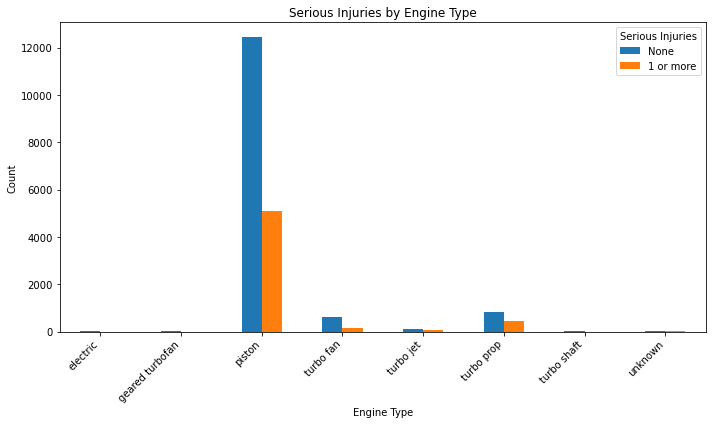

In [22]:
injuries_by_engine_type = df.groupby(['engine type', 'has serious injuries']).size().unstack(fill_value=0)
injuries_by_engine_type = injuries_by_engine_type.rename(columns={True: '1 or more', False: 'None'})


# Create a bar plot
injuries_by_engine_type.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Serious Injuries by Engine Type')
plt.xlabel('Engine Type')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Count')
plt.legend(title='Serious Injuries')
plt.tight_layout()
plt.show()



## Weather

In [23]:
df['weather condition'].value_counts()

weather condition
vmc    17884
imc     1169
unk      179
Name: count, dtype: int64

In [24]:
df=df[~df['weather condition'].isin(['unk'])]
df['weather condition']=df['weather condition'].str.upper()

### IMC and VMC 

VMC, or Visual Meteorological Conditions, are conditions considered safe to navigate by using visual reference to the ground and other landmarks. 

IMC, or Instrument Meteorological Conditions, require navigational equipment, and pilots must be IFR-rated, as well as the aircraft.

I compared serious injuries by weather conditions in the data. 



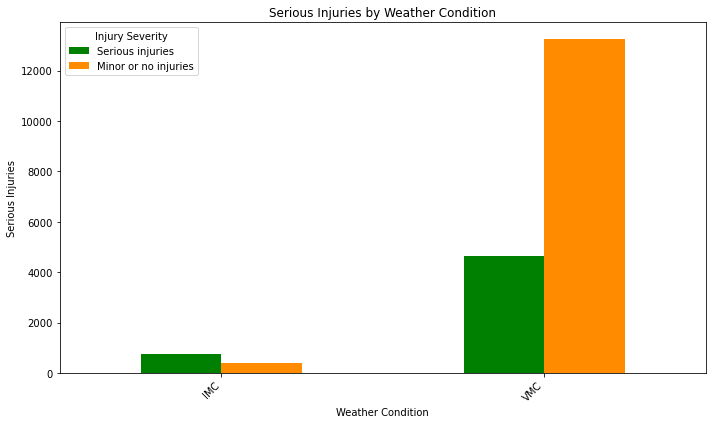

In [25]:
# Count True/False for serious injuries per weather condition
serious_flags = df.groupby(['weather condition', 'has serious injuries']).size().unstack(fill_value=0)

# Rename columns for clarity
serious_flags.rename(columns={True: 'Serious injuries', False: 'Minor or no injuries'}, inplace=True)


color_list = ['green', 'darkorange']  # Match order of columns
serious_flags = serious_flags[['Serious injuries', 'Minor or no injuries']]


serious_flags.plot(kind='bar', stacked=False, color=color_list, figsize=(10, 6))

plt.xlabel('Weather Condition')
plt.ylabel('Serious Injuries')
plt.title('Serious Injuries by Weather Condition')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Injury Severity')
plt.tight_layout()
plt.show()



In [26]:
df= df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19601 entries, 0 to 19600
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   event type                 19601 non-null  object 
 1   aircraft category          19601 non-null  object 
 2   number of engines          19601 non-null  float64
 3   engine type                19601 non-null  object 
 4   total fatal injuries       17033 non-null  float64
 5   total serious injuries     17021 non-null  float64
 6   total minor injuries       17310 non-null  float64
 7   total uninjured            19042 non-null  float64
 8   weather condition          19053 non-null  object 
 9   cause of event             18679 non-null  object 
 10  combined serious injuries  19601 non-null  float64
 11  has serious injuries       19601 non-null  bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 1.7+ MB


# Exploratory Data Analysis

In [27]:
#Getting a closer look at 'cause of event' to visually check for trends. 
#Removing 'probable cause' rows as this seems to be a placeholder value.
filled_reports = df[df['cause of event']!= 'probable cause']['cause of event']

Scanning some of the entries, I notice trends in wording that are fairly consistent. Using common phrases found in probably cause, I filter the values by human error and by other causes (engine malfunction, collisions with animals, ice, etc.

In [28]:
#Filtering 'cause of event' by pilot error
human_error = df.loc[df['cause of event'].str.contains('pilot|crew|mechanic|instructor|captain|loss of directional control|maintenance', case=False, na=False), 'cause of event']


In [29]:
# Create a new column that marks whether the cause is likely related to human error
df['has_human_error'] = df['cause of event'].str.contains
('pilot|crew|mechanic|instructor|captain|loss of directional control|maintenance', case=False, na=False)

SyntaxError: invalid syntax (<ipython-input-29-15450cf3b07c>, line 3)

In [ ]:
df['has_human_error'].value_counts()

In [ ]:
human_and_weather_error = df.loc[df['cause of event'].str.contains('pilot|wind|gust|weather|visibility|visible|visual|ice|turbulence|turbulent|fog|dark|viually|storm|rain|snow|meteorological|conditions|icing', 
    case=False, na=False), 'cause of event']

In [ ]:
df['has_human_weather_error'] = df['cause of event'].str.contains(
    'pilot|wind|gust|weather|visibility|visible|visual|ice|turbulence|turbulent|fog|dark|viually|storm|rain|snow|meteorological|conditions|icing',
    case=False,
    na=False)


In [ ]:
df['has_human_weather_error'].value_counts()

In [ ]:
human_error_by_engine = df.groupby(['engine type', 'has_human_error']).size().unstack(fill_value=0)

# Rename the columns clarity
human_error_by_engine.columns = ['No Human Error', 'Human Error']


human_error_by_engine.plot(kind='bar', figsize=(10, 6))

plt.title('Human Error vs Engine Type')
plt.xlabel('Engine Type')
plt.ylabel('Number of Accidents')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Human Error Presence')

plt.tight_layout()
plt.show()


## Conclusions

Piston Engines have a lower percentage of serious injuries compared turbo fan or turbo prop engines. 

Human error and weather contribute to risk of serious injury. If we hire an aviation team, we should have high maintenance and safety standards and consider cancelling travel during inclement weather. We should do more research on how the chance of human error related to flying can be offset by quality training and experience.

## Limitations

We don't have data that compares crashes to total flights, which might reverse some of the trends in this dataset. 

While piston engines seem safer, we don't know why that's true, which could affect our safety strategy for an aviation team. This also may not hold true when looking at a larger, more comprehensive data set about air travel.

# Next Steps

**Human error and weather** have a large contribution to risk of serious injury. If we hire an aviation team, we should have high maintenance and safety standards and consider cancelling travel during inclement weather. 


**Compare crash data** to a larger dataset about flight and air travel.


**Do more research** on how effective pilot and personnel training to reduce risk.